In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice
%matplotlib inline
from IPython.display import Image
from IPython.display import HTML

In [2]:
training_set = pd.read_csv('data/train.csv')
training_set.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [3]:
training_set = training_set.loc[pd.notna(training_set.location) & pd.notnull(training_set.location)]
training_set.describe()

,id,target
count,5080.000000,5080.000000
mean,5407.112598,0.432283
std,3116.359041,0.495442
min,48.000000,0.000000
25%,2728.750000,0.000000
50%,5360.500000,0.000000
75%,8086.000000,1.000000
max,10833.000000,1.000000


# Unificacion de Regiones

In [4]:
#USA = United States = US lo consideramos como parte de la capital de estados unidos, Washington, D.C.
training_set['location'] = training_set['location'].apply(lambda x: 'Washington, D.C.' if 'US' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Washington, D.C.' if 'United States' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Washington, D.C.' if 'Washington' in x else x)
#London, England = London = UK (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'London' if 'London' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'London' if 'UK' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'London' if 'United Kingdom' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'London' if 'England' in x else x)
#New York = NYC = New York, NY = New York City
training_set['location'] = training_set['location'].apply(lambda x: 'New York' if 'NYC' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'New York' if 'NYHC' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'New York' if 'New York' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'New York' if 'new york' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'New York' if x == 'NY' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'New York' if x == 'ny' else x)
#Los Angeles, CA = Los Angeles
training_set['location'] = training_set['location'].apply(lambda x: 'Los Angeles' if 'Los Angeles' in x else x)
#Sacramento, CA = Sacramento
training_set['location'] = training_set['location'].apply(lambda x: 'Sacramento' if 'Sacramento' in x else x)
#San Francisco, CA = San Francisco
training_set['location'] = training_set['location'].apply(lambda x: 'San Francisco' if 'San Francisco' in x else x)
#California, USA = California = California, United States
training_set['location'] = training_set['location'].apply(lambda x: 'California' if 'California' in x else x)
#Pennsylvania, USA = Pennsylvania
training_set['location'] = training_set['location'].apply(lambda x: 'Pennsylvania' if 'Pennsylvania' in x else x)
#Chicago, IL = Chicago
training_set['location'] = training_set['location'].apply(lambda x: 'Chicago' if 'Chicago' in x else x)
#Nashville, TN = Nashville
training_set['location'] = training_set['location'].apply(lambda x: 'Nashville' if 'Nashville' in x else x)
#Denver, Colorado = Colorado
training_set['location'] = training_set['location'].apply(lambda x: 'Colorado' if 'Denver' in x else x)
#San Diego, CA
training_set['location'] = training_set['location'].apply(lambda x: 'San Diego' if 'San Diego' in x else x)
#Morioh, Japan = Morioh
training_set['location'] = training_set['location'].apply(lambda x: 'Morioh' if 'Morioh' in x else x)
#Memphis, TN = Memphis
training_set['location'] = training_set['location'].apply(lambda x: 'Memphis' if 'Memphis' in x else x)
#Dallas, TX = Dallas
training_set['location'] = training_set['location'].apply(lambda x: 'Dallas' if 'Dallas' in x else x)
#Seattle, Washington = Seattle
training_set['location'] = training_set['location'].apply(lambda x: 'Seattle' if 'Seattle' in x else x)
#Nigeria = Abuya (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'Abuya' if 'Nigeria' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Abuya' if 'nigeria' in x else x)
#Canada = Ottawa (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'Ottawa' if 'Canada' in x else x)
#Indonesia = Yakarta (capital) = Jakarta/Kuala Lumpur/S'pore
training_set['location'] = training_set['location'].apply(lambda x: 'Yakarta' if 'Indonesia' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Yakarta' if 'Jakarta' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Yakarta' if 'Yakarta' in x else x)
#Kenya = Nairobi (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'Nairobi' if 'Kenya' in x else x)
#Australia = Canberra (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'Canberra' if 'Australia' in x else x)
#South Africa = Pretoria (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'Pretoria' if 'Africa' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Pretoria' if 'AFRICA' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Pretoria' if 'africa' in x else x)
#India = Nueva Delhi (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'Nueva Delhi' if 'India' in x else x)
#Ireland = Dublín (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'Dublín' if 'Ireland' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Dublín' if 'Dublin' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Dublín' if 'Dublín' in x else x)
#Paterson, New Jersey = New Jersey
training_set['location'] = training_set['location'].apply(lambda x: 'New Jersey' if 'New Jersey' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'New Jersey' if 'Jersey' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'New Jersey' if x == 'NJ' else x)
training_set['location'] = training_set['location'].apply(lambda x: 'New Jersey' if x == 'nj' else x)
#Atlanta, GA = Atlanta
training_set['location'] = training_set['location'].apply(lambda x: 'Atlanta' if 'Atlanta' in x else x)
#Oklahoma City, OK = Oklahoma
training_set['location'] = training_set['location'].apply(lambda x: 'Oklahoma' if 'Oklahoma' in x else x)
#Bend, Oregon = Oregon
training_set['location'] = training_set['location'].apply(lambda x: 'Oregon' if 'Oregon' in x else x)
#Houston, TX = Houston
training_set['location'] = training_set['location'].apply(lambda x: 'Houston' if 'Houston' in x else x)
#Haddonfield, NJ = Haddonfield
training_set['location'] = training_set['location'].apply(lambda x: 'Haddonfield' if 'Haddonfield' in x else x)
#Texas = , TX
training_set['location'] = training_set['location'].apply(lambda x: 'Texas' if ', TX' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Texas' if ', texas' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Texas' if x == 'tx' else x)
#Lagos = lagos
training_set['location'] = training_set['location'].apply(lambda x: 'Lagos' if 'lagos' in x else x)
#Puerto Rico = San Juan (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'San Juan' if 'Puerto Rico' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'San Juan' if 'San Juan' in x else x)
#Oakland = Selma2Oakland
training_set['location'] = training_set['location'].apply(lambda x: 'Oakland' if 'Oakland' in x else x)
#Brazil = Brasilia (capital)
training_set['location'] = training_set['location'].apply(lambda x: 'Brasilia' if 'Brazil' in x else x)
training_set['location'] = training_set['location'].apply(lambda x: 'Brasilia' if 'Brasil' in x else x)

# Limpieza de datos

In [5]:
#limpiamos los que no son regiones
training_set = training_set.loc[(~training_set.location.str.contains('Earth', na=False))\
                                & (~training_set.location.str.contains('Everywhere', na=False))\
                                & (~training_set.location.str.contains('ss', na=False))\
                                & (~training_set.location.str.contains('304', na=False))\
                                & (~training_set.location.str.contains('Worldwide', na=False))\
                                & (~training_set.location.str.contains('World Wide!!', na=False))\
                                & (~training_set.location.str.contains('World Wide', na=False))\
                                & (~training_set.location.str.contains('WorldWide', na=False))\
                                & (~training_set.location.str.contains('World', na=False))\
                                & (~training_set.location.str.contains('world', na=False))\
                                & (~training_set.location.str.contains('Nowhere. Everywhere.', na=False))\
                                & (~training_set.location.str.contains('Happily Married with 2 kids', na=False))\
                                & (~training_set.location.str.contains('Pedophile hunting ground', na=False))\
                                & (~training_set.location.str.contains('milky way', na=False))\
                                & (~training_set.location.str.contains('Live On Webcam', na=False))\
                                & (~training_set.location.str.contains('Est. September 2012 - Bristol', na=False))\
                                & (~training_set.location.str.contains('Road to the Billionaires Club', na=False))\
                                & (~training_set.location.str.contains('Buy Give Me My Money', na=False))\
                                & (~training_set.location.str.contains('Narnia', na=False))\
                                & (~training_set.location.str.contains('Twitter Lockout in progress', na=False))\
                                & (~training_set.location.str.contains('hollywoodland', na=False))\
                                & (~training_set.location.str.contains('Nirvana', na=False))\
                                & (~training_set.location.str.contains('Pittsburgh', na=False))\
                                & (~training_set.location.str.contains('PLFD', na=False))\
                                & (~training_set.location.str.contains('POFFIN', na=False))\
                                & (~training_set.location.str.contains('justin', na=False))\
                                & (~training_set.location.str.contains('lesa', na=False))\
                                & (~training_set.location.str.contains('marvel', na=False))\
                                & (~training_set.location.str.contains('nap queen', na=False))\
                                & (~training_set.location.str.contains('ljp/4', na=False))\
                                & (~training_set.location.str.contains('labyrinthia', na=False))\
                                & (~training_set.location.str.contains('m3, k, a, d', na=False))\
                                & (~training_set.location.str.contains('lost in history', na=False))\
                                & (~training_set.location.str.contains('blackfalds', na=False))\
                                & (~training_set.location.str.contains('amsterdayum 120615', na=False))\
                                & (~training_set.location.str.contains('frankie', na=False))\
                                & (~training_set.location.str.contains('with', na=False))\
                                & (~training_set.location.str.contains('CandyBloom', na=False))\
                                & (~training_set.location.str.contains('Shipwreck', na=False))\
                                & (~training_set.location.str.contains('Zeron', na=False))\
                                & (~training_set.location.str.contains('Silicon Valley', na=False))\
                                & (~training_set.location.str.contains('SWMO', na=False))\
                                & (~training_set.location.str.contains('On a beach', na=False))\
                                & (~training_set.location.str.contains('Old Blighty', na=False))\
                                & (~training_set.location.str.contains('please', na=False))\
                                & (~training_set.location.str.contains('Academy', na=False))\
                                & (~training_set.location.str.contains('school', na=False))\
                                & (~training_set.location.str.contains('PH', na=False))\
                                & (~training_set.location.str.contains('places', na=False))\
                                & (~training_set.location.str.contains('Storybrooke', na=False))\
                                & (~training_set.location.str.contains('Rockford', na=False))\
                                & (~training_set.location.str.contains('Palace', na=False))\
                                & (~training_set.location.str.contains('In Hell', na=False))\
                                & (~training_set.location.str.contains('11202', na=False))\
                                & (~training_set.location.str.contains('MAD as Hell', na=False))\
                                & (~training_set.location.str.contains('under the blanket', na=False))\
                               ]

# Regiones con tweets Reales vs Falsos

In [6]:
location_tweets = training_set.groupby(['location', 'target']).size().reset_index()
location_tweets.rename({0:'count_location'}, axis=1, inplace=True)
location_tweets.describe()

,target,count_location
count,2713.000000,2713.000000
mean,0.408773,1.754147
std,0.491698,7.462468
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,216.000000


In [7]:
location_tweets.sort_values(by='count_location', ascending=False, inplace=True)
location_tweets.head(10)

,location,target,count_location
2225,"Washington, D.C.",1,216
2224,"Washington, D.C.",0,193
1240,London,0,168
1476,New York,0,111
1241,London,1,96
1477,New York,1,53
1566,Ottawa,0,44
214,Abuya,1,44
1521,Nueva Delhi,1,37
500,Canberra,1,36


In [8]:
location_tweets_reales = location_tweets.loc[location_tweets.target == 1]
location_tweets_fakes = location_tweets.loc[location_tweets.target == 0]

In [9]:
location_tweets_reales.describe()

,target,count_location
count,1109.0,1109.000000
mean,1.0,1.870153
std,0.0,7.768962
min,1.0,1.000000
25%,1.0,1.000000
50%,1.0,1.000000
75%,1.0,1.000000
max,1.0,216.000000


In [10]:
location_tweets_fakes.describe()

,target,count_location
count,1604.0,1604.000000
mean,0.0,1.673940
std,0.0,7.244352
min,0.0,1.000000
25%,0.0,1.000000
50%,0.0,1.000000
75%,0.0,1.000000
max,0.0,193.000000


In [11]:
location_tweets_reales.head(30)

,location,target,count_location
2225,"Washington, D.C.",1,216
1241,London,1,96
1477,New York,1,53
214,Abuya,1,44
1521,Nueva Delhi,1,37
500,Canberra,1,36
1567,Ottawa,1,34
491,California,1,27
554,Chicago,1,20
1403,Mumbai,1,19


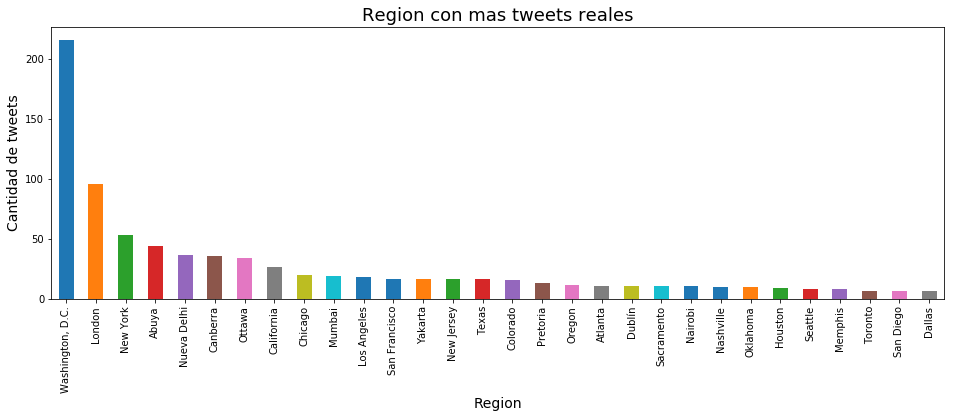

In [12]:
plot_location_tweets_reales = location_tweets_reales.head(30)
plot_location_tweets_reales = plot_location_tweets_reales.plot(x='location', y='count_location', kind='bar',figsize=(16,5))
plot_location_tweets_reales.set_title('Region con mas tweets reales', size=18)
plot_location_tweets_reales.set_ylabel('Cantidad de tweets', size=14)
plot_location_tweets_reales.set_xlabel('Region', size=14)
plot_location_tweets_reales.legend().set_visible(False)
plt.show()

In [13]:
location_tweets_fakes.head(30)

,location,target,count_location
2224,"Washington, D.C.",0,193
1240,London,0,168
1476,New York,0,111
1566,Ottawa,0,44
1245,Los Angeles,0,30
553,Chicago,0,25
2013,Texas,0,25
499,Canberra,0,24
490,California,0,21
1520,Nueva Delhi,0,20


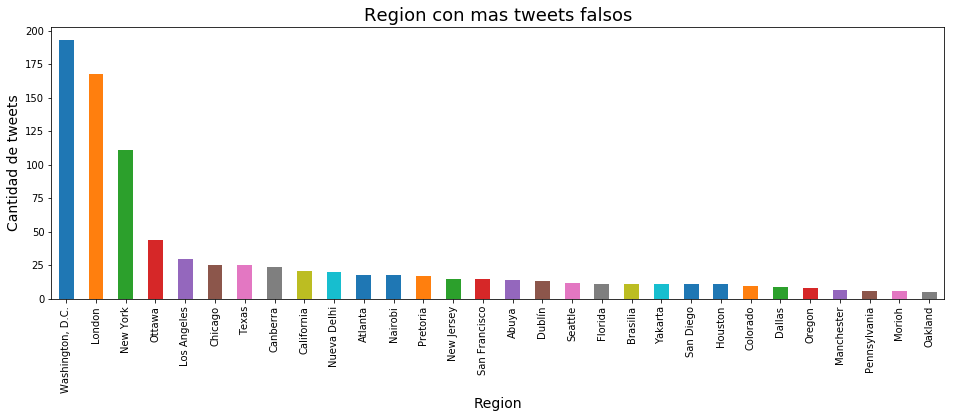

In [14]:
plot_location_tweets_fakes = location_tweets_fakes.head(30)
plot_location_tweets_fakes = plot_location_tweets_fakes.plot(x='location', y='count_location', kind='bar',figsize=(16,5))
plot_location_tweets_fakes.set_title('Region con mas tweets falsos', size=18)
plot_location_tweets_fakes.set_ylabel('Cantidad de tweets', size=14)
plot_location_tweets_fakes.set_xlabel('Region', size=14)
plot_location_tweets_fakes.legend().set_visible(False)
plt.show()

In [15]:
regions = [{'location': 'Washington, D.C.', 'latitude': 38.8951111, 'longitude': -77.0363693},
           {'location': 'New York', 'latitude': 40.7142715, 'longitude': -74.0059662},
           {'location': 'Abuya', 'latitude': 9.06447, 'longitude': 7.48321},
           {'location': 'London', 'latitude': 51.5085297, 'longitude': -0.12574},
           {'location': 'Nueva Delhi', 'latitude': 28.6519508, 'longitude': 77.2314911},
           {'location': 'Mumbai', 'latitude': 19.0712, 'longitude': 72.8762},
           {'location': 'California', 'latitude': 37.7272, 'longitude': -123.032},
           {'location': 'Los Angeles', 'latitude': 34.0522308, 'longitude': -118.2436829},
           {'location': 'Ottawa', 'latitude': 45.411171, 'longitude': -75.6981201},
           {'location': 'San Francisco', 'latitude': 37.7272, 'longitude': -123.032},
           {'location': 'Chicago', 'latitude': 41.850029, 'longitude': -87.6500473},
           {'location': 'Yakarta', 'latitude': -6.20199, 'longitude': 106.829},
           {'location': 'Sacramento', 'latitude': 38.5815697, 'longitude': -121.4944},
           {'location': 'Colorado', 'latitude': 38.8338814, 'longitude': -104.8213577},
           {'location': 'Canberra', 'latitude': -35.2834587, 'longitude': 149.128067},
           {'location': 'Nashville', 'latitude': 36.1658897, 'longitude': -86.7844391},
           {'location': 'Memphis', 'latitude': 35.1495285, 'longitude': -90.0489807},
           {'location': 'Nairobi', 'latitude': -1.29233, 'longitude': 36.82},
           {'location': 'Toronto', 'latitude': 43.7001114, 'longitude': -79.4162979},
           {'location': 'Florida', 'latitude': 25.7742691, 'longitude': -80.1936569},
           {'location': 'Seattle', 'latitude': 47.6062088, 'longitude': -122.3320694},
           {'location': 'Pennsylvania', 'latitude': 39.9523315, 'longitude': -75.1637878},
           {'location': 'Pretoria', 'latitude': -25.7448597, 'longitude': 28.18783},
           {'location': 'San Diego', 'latitude': 32.7153282, 'longitude': -117.1572571},
           {'location': 'Texas', 'latitude': 35.3236900, 'longitude': -92.2890400},
           {'location': 'Manchester', 'latitude': 53.4809494, 'longitude': 2.2374301},
           {'location': 'Ireland', 'latitude': 53.3434, 'longitude': -6.26761},
           {'location': 'Morioh', 'latitude': 36.2048225, 'longitude': 138.2529297},
           {'location': 'Oregon', 'latitude': 44.0001300, 'longitude': -120.5013900},
           {'location': 'Atlanta', 'latitude': 33.7451100, 'longitude': -84.3899300},
           {'location': 'Dublín', 'latitude': 53.3434, 'longitude': -6.26761},
           {'location': 'Oklahoma', 'latitude': 35.4675598, 'longitude': -97.5164337},
           {'location': 'Dallas', 'latitude': 32.7830582, 'longitude': -96.8066711},
           {'location': 'Oakland', 'latitude': 37.8043709, 'longitude': -122.2707977},
           {'location': 'Houston', 'latitude': 29.7632809, 'longitude': -95.3632736},
           {'location': 'New Jersey', 'latitude': 40.7281609, 'longitude': -74.0776367},
           {'location': 'Brasilia', 'latitude': -15.7801, 'longitude': -47.9292},
          ]
regions = pd.DataFrame(regions)

In [16]:
location_tweets_reales_top30 = location_tweets_reales.head(30)
regions_location_tweets_reales = location_tweets_reales_top30.merge(regions, on=['location'], how='inner')
regions_location_tweets_reales

,location,target,count_location,latitude,longitude
0,"Washington, D.C.",1,216,38.895111,-77.036369
1,London,1,96,51.508530,-0.125740
2,New York,1,53,40.714272,-74.005966
3,Abuya,1,44,9.064470,7.483210
4,Nueva Delhi,1,37,28.651951,77.231491
5,Canberra,1,36,-35.283459,149.128067
6,Ottawa,1,34,45.411171,-75.698120
7,California,1,27,37.727200,-123.032000
8,Chicago,1,20,41.850029,-87.650047
9,Mumbai,1,19,19.071200,72.876200


In [17]:
def generate_file_kml(nombre):
    archivo = open(nombre, "w")
    archivo.write('<?xml version="1.0" encoding="UTF-8"?>\n')
    archivo.write('<kml xmlns="http://earth.google.com/kml/2.1">\n')
    archivo.write("\t<Document>\n")
    archivo.write("\t\t<name>" + nombre + "</name>\n")
    archivo.write("\n")
    archivo.close()
    
def add_region(file, region, coordinates):
    archivo = open(file, "a")
    archivo.write("\t\t<Placemark>\n")
    archivo.write("\t\t\t<name>" + region + "</name>\n")
    archivo.write("\t\t\t<region>" + region + "</region>\n")
    archivo.write("\t\t\t<Point>\n")
    archivo.write("\t\t\t\t<coordinates>" + coordinates + "</coordinates>\n")
    archivo.write("\t\t\t</Point>\n")
    archivo.write("\t\t</Placemark>\n")
    archivo.write("\n")

def close_file_kml(file):
    archivo = open(file, "a")
    archivo.write("\t</Document>\n")
    archivo.write("</kml>")
    archivo.close()

generate_file_kml('regiones_con_mas_tweets_reales.kml')
for i in range(30):
    add_region('regiones_con_mas_tweets_reales.kml',\
       str(regions_location_tweets_reales['location'][i]),\
       str(regions_location_tweets_reales['longitude'][i]) + ',' + str(regions_location_tweets_reales['latitude'][i]))
close_file_kml('regiones_con_mas_tweets_reales.kml')

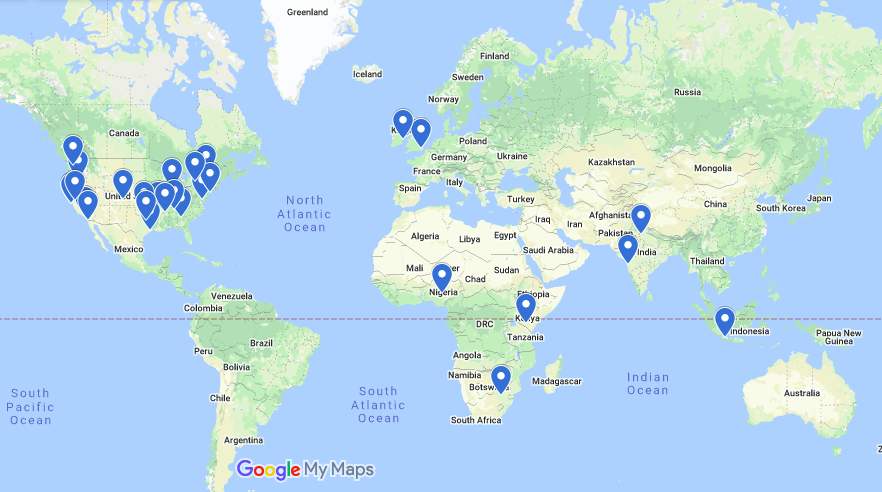

In [18]:
Image("regiones_con_mas_tweets_reales.png")

In [19]:
location_tweets_fakes_top30 = location_tweets_fakes.head(30)
regions_location_tweets_fakes = location_tweets_fakes_top30.merge(regions, on=['location'], how='inner')
regions_location_tweets_fakes.head(30)

,location,target,count_location,latitude,longitude
0,"Washington, D.C.",0,193,38.895111,-77.036369
1,London,0,168,51.508530,-0.125740
2,New York,0,111,40.714272,-74.005966
3,Ottawa,0,44,45.411171,-75.698120
4,Los Angeles,0,30,34.052231,-118.243683
5,Chicago,0,25,41.850029,-87.650047
6,Texas,0,25,35.323690,-92.289040
7,Canberra,0,24,-35.283459,149.128067
8,California,0,21,37.727200,-123.032000
9,Nueva Delhi,0,20,28.651951,77.231491


In [20]:
generate_file_kml('regiones_con_mas_tweets_falsos.kml')
for i in range(30):
    add_region('regiones_con_mas_tweets_falsos.kml',\
       str(regions_location_tweets_fakes['location'][i]),\
       str(regions_location_tweets_fakes['longitude'][i]) + ',' + str(regions_location_tweets_fakes['latitude'][i]))

close_file_kml('regiones_con_mas_tweets_falsos.kml')

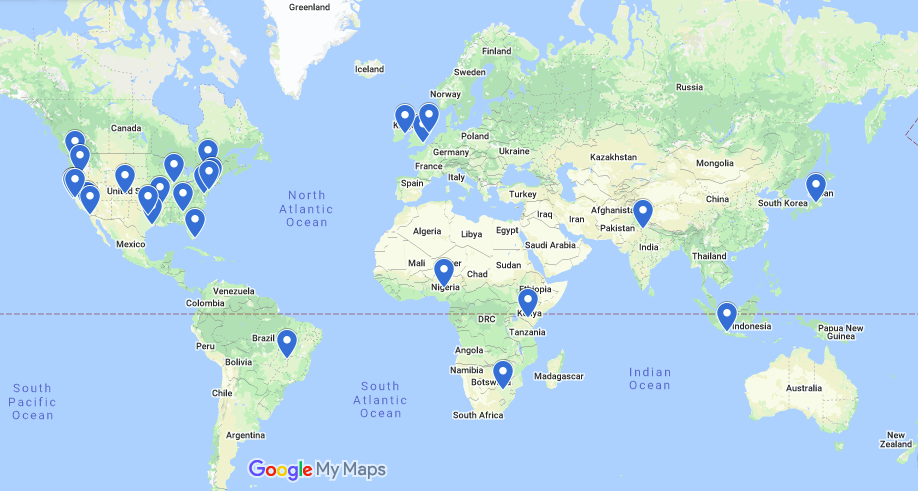

In [21]:
Image("regiones_con_mas_tweets_falsos.png")

# Regiones con tweets Reales vs Falsos por Keyword

In [22]:
keyword_tweets = training_set.loc[:,['location', 'keyword', 'target']]
keyword_tweets = keyword_tweets.loc[pd.notna(keyword_tweets.keyword) & pd.notnull(keyword_tweets.keyword)]
keyword_tweets['keyword'].replace('%20', ' ', regex=True, inplace=True) 
keyword_tweets.describe()

,target
count,4759.000000
mean,0.435806
std,0.495914
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [23]:
keyword_tweets_reales = keyword_tweets.loc[keyword_tweets.target == 1]
keyword_tweets_fakes = keyword_tweets.loc[keyword_tweets.target == 0]

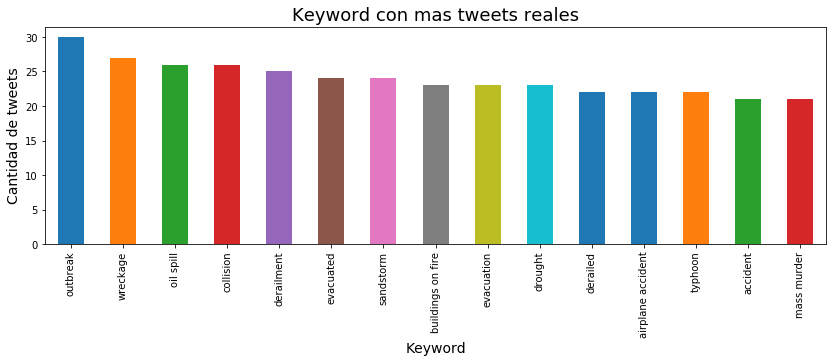

In [24]:
keyword_tweets_reales = keyword_tweets_reales.groupby(['keyword']).size().reset_index()
keyword_tweets_reales.rename({0:'count_keyword'}, axis=1, inplace=True)
keyword_tweets_reales.sort_values(by='count_keyword', ascending=False, inplace=True)

plot_keyword_tweets_reales = keyword_tweets_reales.head(15)
plot_keyword_tweets_reales = plot_keyword_tweets_reales.plot(x='keyword', y='count_keyword', kind='bar',figsize=(14,4))
plot_keyword_tweets_reales.set_title('Keyword con mas tweets reales', size=18)
plot_keyword_tweets_reales.set_ylabel('Cantidad de tweets', size=14)
plot_keyword_tweets_reales.set_xlabel('Keyword', size=14)
plot_keyword_tweets_reales.legend().set_visible(False)
plt.show()

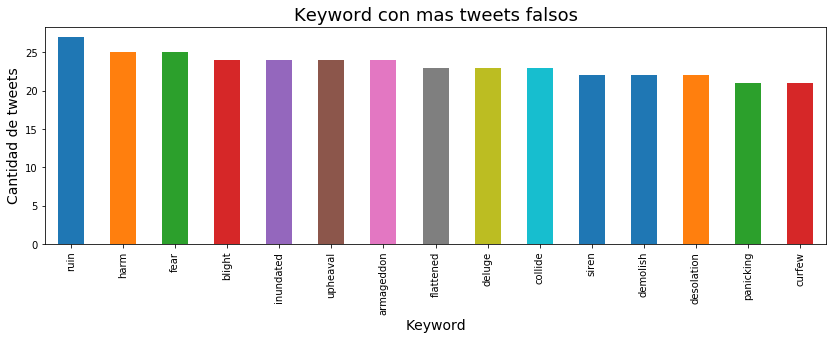

In [25]:
keyword_tweets_fakes = keyword_tweets_fakes.groupby(['keyword']).size().reset_index()
keyword_tweets_fakes.rename({0:'count_keyword'}, axis=1, inplace=True)
keyword_tweets_fakes.sort_values(by='count_keyword', ascending=False, inplace=True)

plot_keyword_tweets_fakes = keyword_tweets_fakes.head(15)
plot_keyword_tweets_fakes = plot_keyword_tweets_fakes.plot(x='keyword', y='count_keyword', kind='bar',figsize=(14,4))
plot_keyword_tweets_fakes.set_title('Keyword con mas tweets falsos', size=18)
plot_keyword_tweets_fakes.set_ylabel('Cantidad de tweets', size=14)
plot_keyword_tweets_fakes.set_xlabel('Keyword', size=14)
plot_keyword_tweets_fakes.legend().set_visible(False)
plt.show()

In [26]:
location_keyword_tweets = keyword_tweets.loc[pd.notna(keyword_tweets.location) & pd.notnull(keyword_tweets.location)]
location_keyword_tweets.describe()

,target
count,4759.000000
mean,0.435806
std,0.495914
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [27]:
location_keyword_tweets_reales = location_keyword_tweets.loc[location_keyword_tweets.target == 1]
location_keyword_tweets_fakes = location_keyword_tweets.loc[location_keyword_tweets.target == 0]

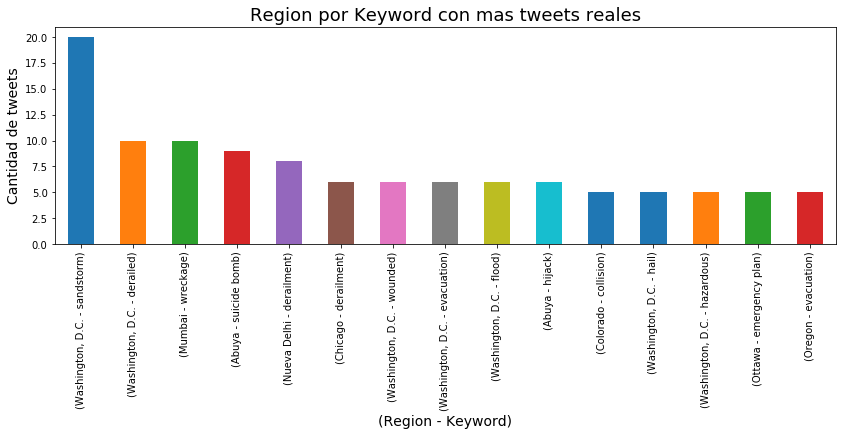

In [28]:
location_keyword_tweets_reales = location_keyword_tweets_reales.groupby(['location', 'keyword']).size().reset_index()
location_keyword_tweets_reales.rename({0:'count'}, axis=1, inplace=True)
location_keyword_tweets_reales.sort_values(by='count', ascending=False, inplace=True)
location_keyword_tweets_reales['location_keyword'] = '(' + location_keyword_tweets_reales['location'] + ' - ' + location_keyword_tweets_reales['keyword'] + ')'

plot_location_keyword_tweets_reales = location_keyword_tweets_reales.head(15)
plot_location_keyword_tweets_reales = plot_location_keyword_tweets_reales.plot(x='location_keyword', y='count', kind='bar',figsize=(14,4))
plot_location_keyword_tweets_reales.set_title('Region por Keyword con mas tweets reales', size=18)
plot_location_keyword_tweets_reales.set_ylabel('Cantidad de tweets', size=14)
plot_location_keyword_tweets_reales.set_xlabel('(Region - Keyword)', size=14)
plot_location_keyword_tweets_reales.legend().set_visible(False)
plt.show()

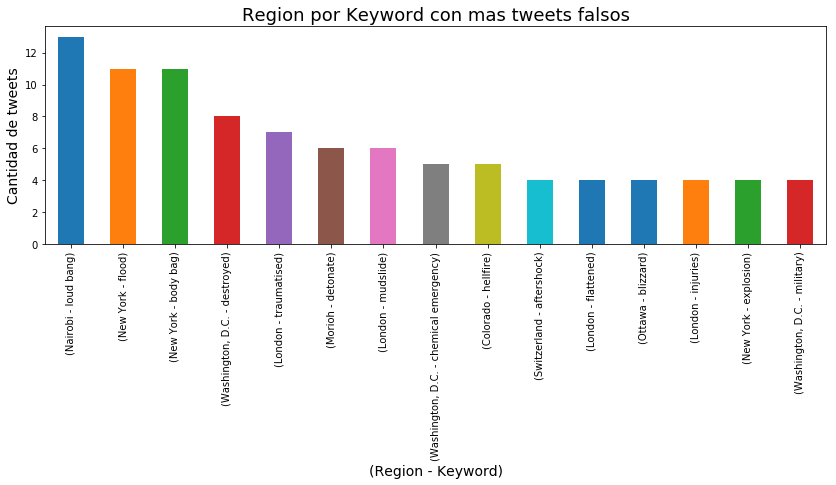

In [29]:
location_keyword_tweets_fakes = location_keyword_tweets_fakes.groupby(['location', 'keyword']).size().reset_index()
location_keyword_tweets_fakes.rename({0:'count'}, axis=1, inplace=True)
location_keyword_tweets_fakes.sort_values(by='count', ascending=False, inplace=True)
location_keyword_tweets_fakes['location_keyword'] = '(' + location_keyword_tweets_fakes['location'] + ' - ' + location_keyword_tweets_fakes['keyword'] + ')'

plot_location_keyword_tweets_fakes = location_keyword_tweets_fakes.head(15)
plot_location_keyword_tweets_fakes = plot_location_keyword_tweets_fakes.plot(x='location_keyword', y='count', kind='bar',figsize=(14,4))
plot_location_keyword_tweets_fakes.set_title('Region por Keyword con mas tweets falsos', size=18)
plot_location_keyword_tweets_fakes.set_ylabel('Cantidad de tweets', size=14)
plot_location_keyword_tweets_fakes.set_xlabel('(Region - Keyword)', size=14)
plot_location_keyword_tweets_fakes.legend().set_visible(False)
plt.show()

# Regiones con tweets Reales vs Falsos por Categoria del Keyword

In [30]:
# Obtenemos categorías para las keywords agrupando términos similares (que hacen referencia a lo mismos)
keyword_category_tweets = keyword_tweets
keyword_category_tweets['keyword_category'] = keyword_tweets['keyword']
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'annihilation' if 'annihilat' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'arson' if 'arson' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'attack' if 'attack' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'bioterrorism' if 'bioterror' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'blaze' if 'blaz' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'blood' if 'bleeding' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'blood' if 'bloody' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'blew up' if 'blown up' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'body bag' if 'body bag' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'bomb' if 'bomb' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'buildings on fire' if 'buildings' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'burning' if 'burned' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'casualty' if 'casualties' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'catastrophe' if 'catastrop' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'collapse' if 'collapse' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'collision' if 'collide' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'crash' if 'crashed' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'crush' if 'crushed' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'death' if 'dead' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'death' if 'deaths' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'deluge' if 'deluge' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'demolition' if 'demolish' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'derailment' if 'derail' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'desolation' if 'desolate' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'destruction' if 'destroy' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'detonation' if 'devastated' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'devastation' if 'annihilated' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'drowning' if 'drown' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'electrocute' if 'electrocute' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'evacuation' if 'evacuat' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'explosion' if 'explode' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'fatality' if 'fatal' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'flood' if 'flood' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'forest fire' if 'forest fire' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'hail' if 'hailstorm' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'hazard' if 'hazard' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'hijacking' if 'hijack' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'hostage' if 'hostage' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'injury' if 'injur' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'inundation' if 'inundated' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'mass murder' if 'mass murder' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'panic' if 'panic' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'quarantine' if 'quarantine' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'rescue' if 'rescue' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'riot' if 'riot' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'screaming' if 'scream' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'siren' if 'siren' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'suicide bomb' if 'suicide bomb' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'sinking' if 'sunk' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'survive' if 'surviv' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'terrorism' if 'terroris' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'thunder' if 'thunder' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'trauma' if 'trauma' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'weapon' if 'weapon' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'wildfire' if 'wild fire' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'wounded' if 'wound' in x else x)
keyword_category_tweets['keyword_category'] = keyword_category_tweets['keyword_category'].apply(lambda x: 'wreckage' if 'wreck' in x else x)
keyword_category_tweets['keyword_category'].value_counts()

bomb                   101
collision               88
fatality                79
flood                   78
evacuation              77
derailment              77
buildings on fire       76
wreckage                73
collapse                72
injury                  68
death                   67
body bag                66
destruction             66
terrorism               66
demolition              65
blaze                   63
drowning                63
survive                 60
rescue                  58
explosion               57
blood                   57
hijacking               55
weapon                  55
attack                  53
wounded                 50
siren                   49
screaming               47
hail                    47
casualty                47
sinking                 46
                      ... 
structural failure      20
obliteration            20
famine                  20
twister                 20
cyclone                 20
avalanche               19
r

In [31]:
print ('Cantidad de keywords distintas:', keyword_category_tweets['keyword'].value_counts().count())
print ('Cantidad de categorías de keywords distintas:', keyword_category_tweets['keyword_category'].value_counts().count())

Cantidad de keywords distintas: 221
Cantidad de categorías de keywords distintas: 142


In [32]:
location_keyword_category_tweets = keyword_category_tweets.loc[pd.notna(keyword_category_tweets.location) & pd.notnull(keyword_category_tweets.location)]
location_keyword_category_tweets.describe()

,target
count,4759.000000
mean,0.435806
std,0.495914
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [33]:
location_keyword_category_tweets_reales = location_keyword_category_tweets.loc[location_keyword_category_tweets.target == 1]
location_keyword_category_tweets_fakes = location_keyword_category_tweets.loc[location_keyword_category_tweets.target == 0]

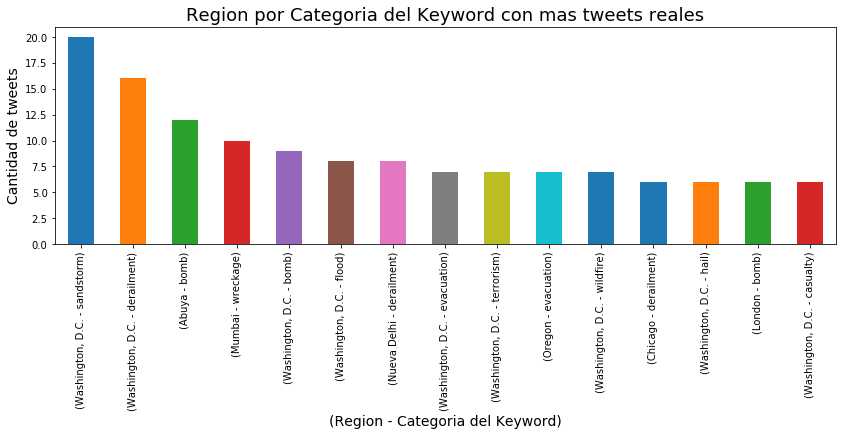

In [34]:
location_keyword_category_tweets_reales = location_keyword_category_tweets_reales.groupby(['location', 'keyword_category']).size().reset_index()
location_keyword_category_tweets_reales.rename({0:'count'}, axis=1, inplace=True)
location_keyword_category_tweets_reales.sort_values(by='count', ascending=False, inplace=True)
location_keyword_category_tweets_reales['location_keywordCategory'] = '(' + location_keyword_category_tweets_reales['location'] + ' - ' + location_keyword_category_tweets_reales['keyword_category'] + ')'

plot_location_keyword_category_tweets_reales = location_keyword_category_tweets_reales.head(15)
plot_location_keyword_category_tweets_reales = plot_location_keyword_category_tweets_reales.plot(x='location_keywordCategory', y='count', kind='bar',figsize=(14,4))
plot_location_keyword_category_tweets_reales.set_title('Region por Categoria del Keyword con mas tweets reales', size=18)
plot_location_keyword_category_tweets_reales.set_ylabel('Cantidad de tweets', size=14)
plot_location_keyword_category_tweets_reales.set_xlabel('(Region - Categoria del Keyword)', size=14)
plot_location_keyword_category_tweets_reales.legend().set_visible(False)
plt.show()

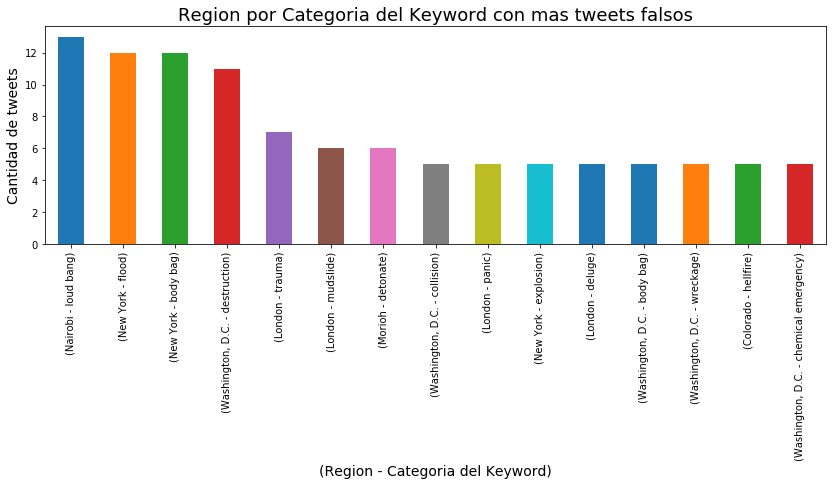

In [35]:
location_keyword_category_tweets_fakes = location_keyword_category_tweets_fakes.groupby(['location', 'keyword_category']).size().reset_index()
location_keyword_category_tweets_fakes.rename({0:'count'}, axis=1, inplace=True)
location_keyword_category_tweets_fakes.sort_values(by='count', ascending=False, inplace=True)
location_keyword_category_tweets_fakes['location_keywordCategory'] = '(' + location_keyword_category_tweets_fakes['location'] + ' - ' + location_keyword_category_tweets_fakes['keyword_category'] + ')'

plot_location_keyword_category_tweets_fakes = location_keyword_category_tweets_fakes.head(15)
plot_location_keyword_category_tweets_fakes = plot_location_keyword_category_tweets_fakes.plot(x='location_keywordCategory', y='count', kind='bar',figsize=(14,4))
plot_location_keyword_category_tweets_fakes.set_title('Region por Categoria del Keyword con mas tweets falsos', size=18)
plot_location_keyword_category_tweets_fakes.set_ylabel('Cantidad de tweets', size=14)
plot_location_keyword_category_tweets_fakes.set_xlabel('(Region - Categoria del Keyword)', size=14)
plot_location_keyword_category_tweets_fakes.legend().set_visible(False)
plt.show()

# Region con mas tweets Reales vs Falsos por categoria del keyword

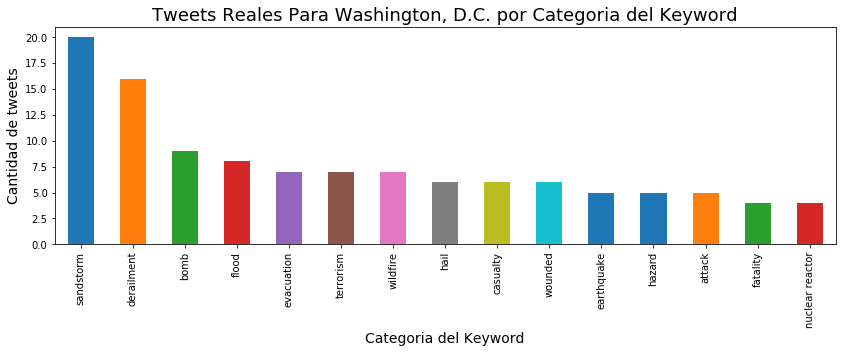

In [36]:
#Para Washington, D.C. con mas tweets reales (216) analizamos la distribucion de categoria del keyword
location_keyword_category_tweets_reales_WDC = location_keyword_category_tweets_reales.loc[location_keyword_category_tweets_reales.location == 'Washington, D.C.']

plot_location_keyword_category_tweets_reales_WDC = location_keyword_category_tweets_reales_WDC.head(15)
plot_location_keyword_category_tweets_reales_WDC = plot_location_keyword_category_tweets_reales_WDC.plot(x='keyword_category', y='count', kind='bar',figsize=(14,4))
plot_location_keyword_category_tweets_reales_WDC.set_title('Tweets Reales Para Washington, D.C. por Categoria del Keyword', size=18)
plot_location_keyword_category_tweets_reales_WDC.set_ylabel('Cantidad de tweets', size=14)
plot_location_keyword_category_tweets_reales_WDC.set_xlabel('Categoria del Keyword', size=14)
plot_location_keyword_category_tweets_reales_WDC.legend().set_visible(False)
plt.show()

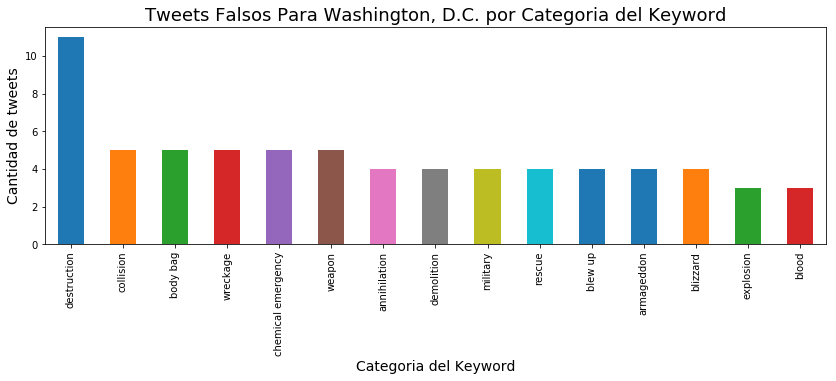

In [37]:
#Para Washington, D.C. con mas tweets falsos (193) analizamos la distribucion de categoria del keyword
location_keyword_category_tweets_fakes_WDC = location_keyword_category_tweets_fakes.loc[location_keyword_category_tweets_fakes.location == 'Washington, D.C.']

plot_location_keyword_category_tweets_fakes_WDC = location_keyword_category_tweets_fakes_WDC.head(15)
plot_location_keyword_category_tweets_fakes_WDC = plot_location_keyword_category_tweets_fakes_WDC.plot(x='keyword_category', y='count', kind='bar',figsize=(14,4))
plot_location_keyword_category_tweets_fakes_WDC.set_title('Tweets Falsos Para Washington, D.C. por Categoria del Keyword', size=18)
plot_location_keyword_category_tweets_fakes_WDC.set_ylabel('Cantidad de tweets', size=14)
plot_location_keyword_category_tweets_fakes_WDC.set_xlabel('Categoria del Keyword', size=14)
plot_location_keyword_category_tweets_fakes_WDC.legend().set_visible(False)
plt.show()

# Categoria del keyword con mas tweets Reales vs Falsos por Region

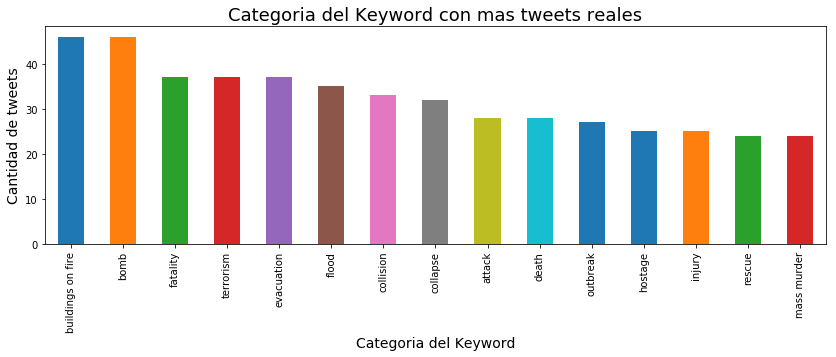

In [38]:
keyword_category_tweets_reales = location_keyword_category_tweets_reales.groupby(['keyword_category']).size().reset_index()
keyword_category_tweets_reales.rename({0:'count'}, axis=1, inplace=True)
keyword_category_tweets_reales.sort_values(by='count', ascending=False, inplace=True)

plot_keyword_category_tweets_reales = keyword_category_tweets_reales.head(15)
plot_keyword_category_tweets_reales = plot_keyword_category_tweets_reales.plot(x='keyword_category', y='count', kind='bar',figsize=(14,4))
plot_keyword_category_tweets_reales.set_title('Categoria del Keyword con mas tweets reales', size=18)
plot_keyword_category_tweets_reales.set_ylabel('Cantidad de tweets', size=14)
plot_keyword_category_tweets_reales.set_xlabel('Categoria del Keyword', size=14)
plot_keyword_category_tweets_reales.legend().set_visible(False)
plt.show()

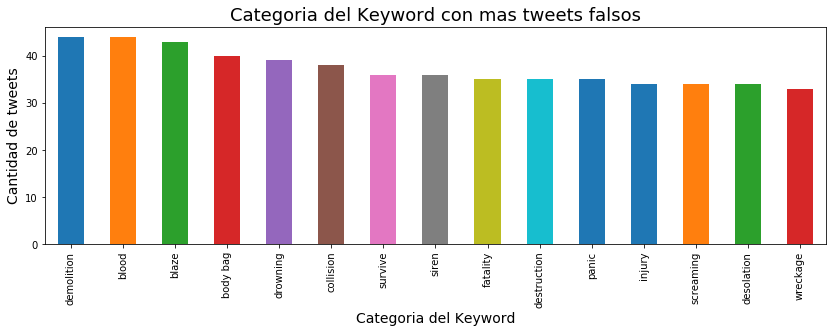

In [39]:
keyword_category_tweets_fakes = location_keyword_category_tweets_fakes.groupby(['keyword_category']).size().reset_index()
keyword_category_tweets_fakes.rename({0:'count'}, axis=1, inplace=True)
keyword_category_tweets_fakes.sort_values(by='count', ascending=False, inplace=True)

plot_keyword_category_tweets_fakes = keyword_category_tweets_fakes.head(15)
plot_keyword_category_tweets_fakes = plot_keyword_category_tweets_fakes.plot(x='keyword_category', y='count', kind='bar',figsize=(14,4))
plot_keyword_category_tweets_fakes.set_title('Categoria del Keyword con mas tweets falsos', size=18)
plot_keyword_category_tweets_fakes.set_ylabel('Cantidad de tweets', size=14)
plot_keyword_category_tweets_fakes.set_xlabel('Categoria del Keyword', size=14)
plot_keyword_category_tweets_fakes.legend().set_visible(False)
plt.show()

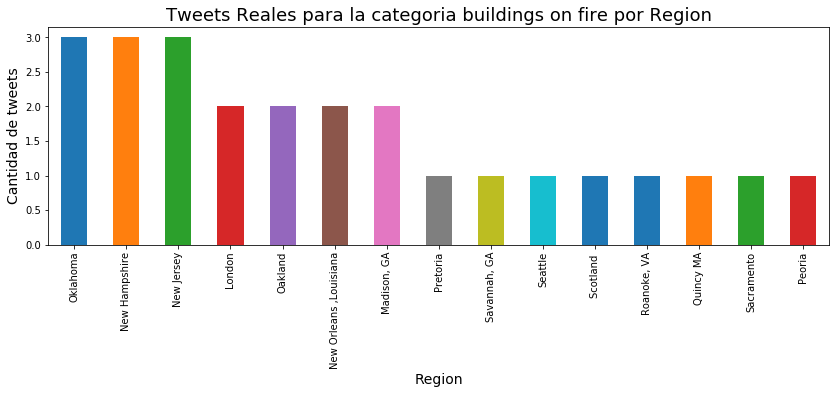

In [40]:
#Para buildings on fire con mas tweets reales analizamos la distribucion de regiones
location_keyword_category_tweets_reales_bof = location_keyword_category_tweets_reales.loc[location_keyword_category_tweets_reales['keyword_category'] == 'buildings on fire']

plot_location_keyword_category_tweets_reales_bof = location_keyword_category_tweets_reales_bof.head(15)
plot_location_keyword_category_tweets_reales_bof = plot_location_keyword_category_tweets_reales_bof.plot(x='location', y='count', kind='bar',figsize=(14,4))
plot_location_keyword_category_tweets_reales_bof.set_title('Tweets Reales para la categoria buildings on fire por Region', size=18)
plot_location_keyword_category_tweets_reales_bof.set_ylabel('Cantidad de tweets', size=14)
plot_location_keyword_category_tweets_reales_bof.set_xlabel('Region', size=14)
plot_location_keyword_category_tweets_reales_bof.legend().set_visible(False)
plt.show()

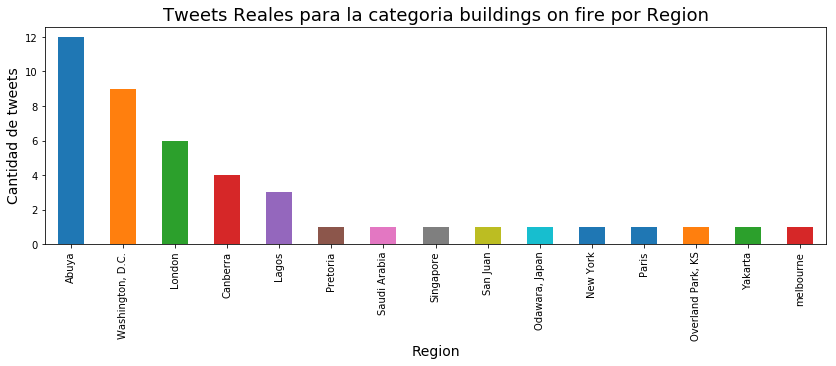

In [41]:
#Para bomb con mas tweets reales analizamos la distribucion de regiones
location_keyword_category_tweets_reales_bomb = location_keyword_category_tweets_reales.loc[location_keyword_category_tweets_reales['keyword_category'] == 'bomb']

plot_location_keyword_category_tweets_reales_bomb = location_keyword_category_tweets_reales_bomb.head(15)
plot_location_keyword_category_tweets_reales_bomb = plot_location_keyword_category_tweets_reales_bomb.plot(x='location', y='count', kind='bar',figsize=(14,4))
plot_location_keyword_category_tweets_reales_bomb.set_title('Tweets Reales para la categoria buildings on fire por Region', size=18)
plot_location_keyword_category_tweets_reales_bomb.set_ylabel('Cantidad de tweets', size=14)
plot_location_keyword_category_tweets_reales_bomb.set_xlabel('Region', size=14)
plot_location_keyword_category_tweets_reales_bomb.legend().set_visible(False)
plt.show()

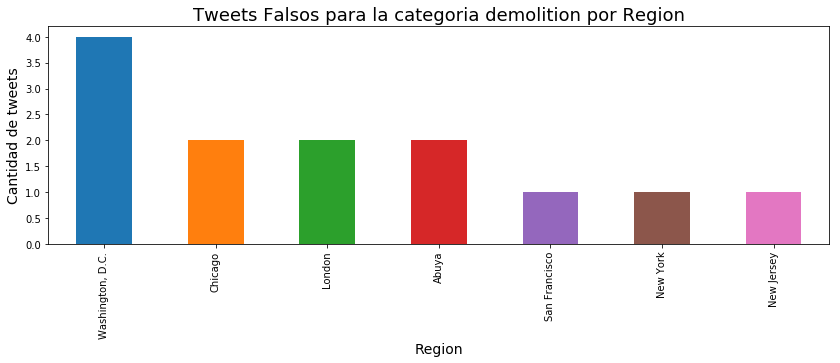

In [42]:
#Para demolition con mas tweets falsos analizamos la distribucion de regiones
location_keyword_category_tweets_reales_demolition = location_keyword_category_tweets_reales.loc[location_keyword_category_tweets_reales['keyword_category'] == 'demolition']

plot_location_keyword_category_tweets_reales_demolition = location_keyword_category_tweets_reales_demolition.head(15)
plot_location_keyword_category_tweets_reales_demolition = plot_location_keyword_category_tweets_reales_demolition.plot(x='location', y='count', kind='bar',figsize=(14,4))
plot_location_keyword_category_tweets_reales_demolition.set_title('Tweets Falsos para la categoria demolition por Region', size=18)
plot_location_keyword_category_tweets_reales_demolition.set_ylabel('Cantidad de tweets', size=14)
plot_location_keyword_category_tweets_reales_demolition.set_xlabel('Region', size=14)
plot_location_keyword_category_tweets_reales_demolition.legend().set_visible(False)
plt.show()

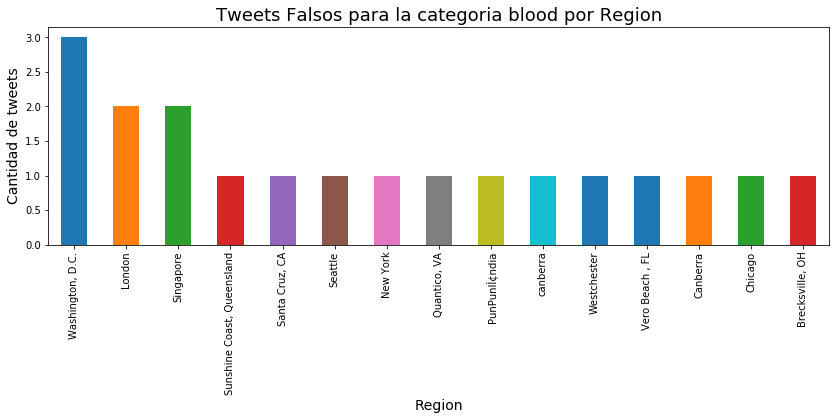

In [43]:
#Para blood con mas tweets falsos analizamos la distribucion de regiones
location_keyword_category_tweets_fakes_blood = location_keyword_category_tweets_fakes.loc[location_keyword_category_tweets_fakes['keyword_category'] == 'blood']

plot_location_keyword_category_tweets_fakes_blood = location_keyword_category_tweets_fakes_blood.head(15)
plot_location_keyword_category_tweets_fakes_blood = plot_location_keyword_category_tweets_fakes_blood.plot(x='location', y='count', kind='bar',figsize=(14,4))
plot_location_keyword_category_tweets_fakes_blood.set_title('Tweets Falsos para la categoria blood por Region', size=18)
plot_location_keyword_category_tweets_fakes_blood.set_ylabel('Cantidad de tweets', size=14)
plot_location_keyword_category_tweets_fakes_blood.set_xlabel('Region', size=14)
plot_location_keyword_category_tweets_fakes_blood.legend().set_visible(False)
plt.show()